In [383]:
%matplotlib notebook

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import hvplot

path = "Downloads/NYPD_Arrest_Data__Year_to_Date_.csv"
df = pd.read_csv(path)

In [385]:
df.columns = ['Arrest Number', 
              'Arrest Date', 
              'Offense Code', 
              'Offense Description 1', 
              'KY number', 
              'Offense Description 2', 
              'Law Code', 
              'Law Category CD',
              'Arrest Borough',
              'Arrest Precinct',
              'Jurisdiction Code',
              'Age Group',
              'Gender',
              'Ethnicity',
              'X Coordinate', 
              'Y Coordinate', 
              'Latitude', 
              'Longitude', 
              'Geocoded', 
              ]

In [386]:
df['Arrest Borough'] = df['Arrest Borough'].replace(['B', 'S', 'K', 'M','Q'],
                                              [1, 
                                               2, 
                                               3, 
                                               4,
                                               5])

In [387]:
df['Gender'] = df['Gender'].replace(['M', 'F'],
                                   [1,2])

df['Law Category CD'] = df['Law Category CD'].replace(['F', 
                                                       'V', 
                                                       'M'],[1,2,3])

In [388]:
df.drop(df[df['Law Category CD'] == '9'].index, inplace = True)
df.drop(df[df['Law Category CD'] == 'I'].index, inplace = True)

In [389]:
df['Law Category CD'].value_counts()

df = df.dropna()

<IPython.core.display.Javascript object>


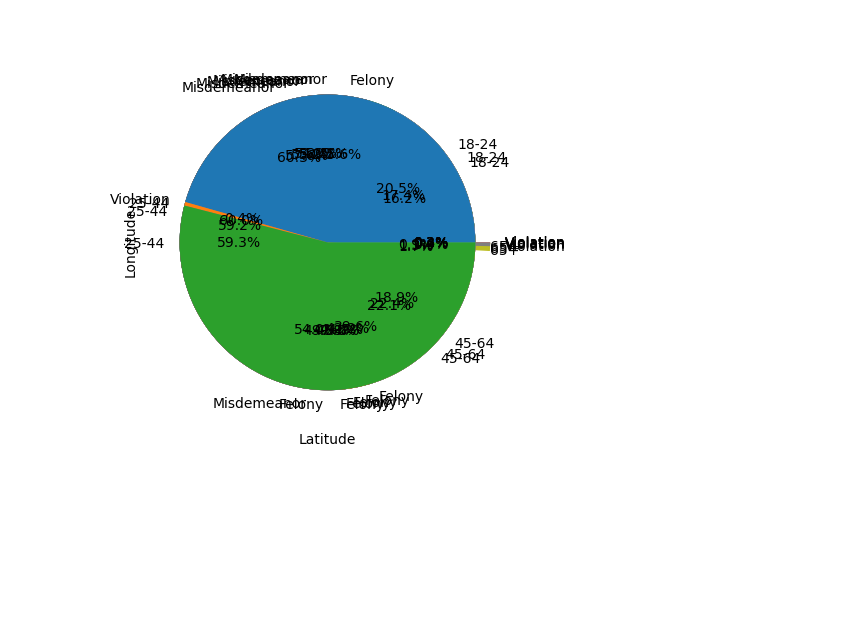

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

In [390]:
df.plot.scatter('Latitude', 'Longitude', alpha = 0.3)

In [391]:
df_Bronx = df.loc[df["Arrest Borough"] == 1 ]
df_Staten = df.loc[df['Arrest Borough']== 2]
df_Brooklyn = df.loc[df['Arrest Borough']== 3]
df_Manhattan = df.loc[df['Arrest Borough'] == 4]
df_Queens = df.loc[df['Arrest Borough'] == 5]

In [392]:
df_Bronx['Law Category CD'].value_counts()

3    18414
1    13514
2       64
Name: Law Category CD, dtype: int64

In [393]:
labels = ['Misdemeanor', 'Felony', 'Violation']
values = [18426, 13515, 64]
explode = (0, 0, 0.1)

plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf11711460>,
 [Text(-0.2592170835117385, 1.069021283050842, 'Misdemeanor'),
  Text(0.2524961409271992, -1.070628646551582, 'Felony'),
  Text(1.1999763195544662, -0.007538733880294192, 'Violation')],
 [Text(-0.14139113646094825, 0.5831025180277319, '57.6%'),
  Text(0.13772516777847227, -0.5839792617554083, '42.2%'),
  Text(0.6999861864067718, -0.004397594763504945, '0.2%')])

In [394]:
df_Staten['Law Category CD'].value_counts()
values = [3751, 2461, 4]

plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf14d4fb80>,
 [Text(-0.35121351635757353, 1.042424609229727, 'Misdemeanor'),
  Text(0.34910544606020927, -1.0431324880048087, 'Felony'),
  Text(1.199997547975605, -0.0024258715001914764, 'Violation')],
 [Text(-0.1915710089223128, 0.5685952413980327, '60.3%'),
  Text(0.19042115239647775, -0.568981357093532, '39.6%'),
  Text(0.6999985696524362, -0.0014150917084450277, '0.1%')])

In [395]:
df_Brooklyn['Law Category CD'].value_counts()
values = [18932, 18545, 335]
plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf0ed13910>,
 [Text(-0.0023761703451305252, 1.0999974335490474, 'Misdemeanor'),
  Text(-0.028237424200739644, -1.0996375074880393, 'Felony'),
  Text(1.199535211003398, -0.033395771634053585, 'Violation')],
 [Text(-0.001296092915525741, 0.5999986001176622, '50.1%'),
  Text(-0.015402231382221623, -0.5998022768116578, '49.0%'),
  Text(0.6997288730853154, -0.019480866786531256, '0.9%')])

In [396]:
df_Queens['Law Category CD'].value_counts()
values = [15035,13559,50]
plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf16603a00>,
 [Text(-0.08593221900242856, 1.096638342270285, 'Misdemeanor'),
  Text(0.07991719769549994, -1.0970930869860125, 'Felony'),
  Text(1.1999819570220265, -0.006580487944483401, 'Violation')],
 [Text(-0.046872119455870116, 0.5981663685110645, '52.5%'),
  Text(0.043591198742999965, -0.5984144110832795, '47.3%'),
  Text(0.6999894749295155, -0.0038386179676153168, '0.2%')])

In [397]:
df_Manhattan['Law Category CD'].value_counts()
values = [18771, 15147, 86]
plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf0b25a0a0>,
 [Text(-0.178980299537023, 1.0853414450658547, 'Misdemeanor'),
  Text(0.17035121731958836, -1.0867292499779946, 'Felony'),
  Text(1.1999621221108494, -0.009534437541197956, 'Violation')],
 [Text(-0.09762561792928526, 0.5920044245813753, '55.2%'),
  Text(0.09291884581068455, -0.5927614090789061, '44.5%'),
  Text(0.699977904564662, -0.005561755232365474, '0.3%')])

In [398]:
df['Law Category CD'].value_counts()
values = [74915,63227,539]
plt.pie(values, explode = explode, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf0b264f70>,
 [Text(-0.13854036148209695, 1.0912408387887662, 'Misdemeanor'),
  Text(0.12520605277950236, -1.0928510622895402, 'Felony'),
  Text(1.1999105460968016, -0.014652008929685222, 'Violation')],
 [Text(-0.0755674698993256, 0.5952222757029633, '54.0%'),
  Text(0.06829421060700128, -0.5961005794306583, '45.6%'),
  Text(0.6999478185564675, -0.008547005208983046, '0.4%')])

In [399]:
df_Misdemeanor = df.loc[df["Law Category CD"] == '3' ]
df_Violation = df.loc[df['Law Category CD'] == '2']
df_Felony = df.loc[df['Law Category CD'] == '1']


In [400]:
df_Misdemeanor['Age Group'].value_counts()
labels = ['18-24', '25-44', '45-64', '65+']
values = [11846, 43955, 16178, 1273]
plt.pie(values, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf0b264e20>,
 [Text(0.9610669987414319, 0.5351170189128139, '18-24'),
  Text(-1.0683712187086285, 0.2618834455154435, '25-44'),
  Text(0.763986955488115, -0.7914063001038096, '45-64'),
  Text(1.0983610267746962, -0.06002545178868297, '65+')],
 [Text(0.5242183629498719, 0.2918820103160803, '16.2%'),
  Text(-0.5827479374774336, 0.14284551573569645, '60.0%'),
  Text(0.4167201575389718, -0.431676163692987, '22.1%'),
  Text(0.5991060146043796, -0.032741155521099796, '1.7%')])

In [401]:
df_Felony['Age Group'].value_counts()
labels = ['18-24', '25-44', '45-64', '65+']
values = [12287, 35588, 11350, 772]
plt.pie(values, labels = labels, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1cf0b2946d0>,
 [Text(0.8800812565935529, 0.6598916439785499, '18-24'),
  Text(-1.0999589441430215, -0.009503746617495102, '25-44'),
  Text(0.8586663613427423, -0.6875260576141208, '45-64'),
  Text(1.0991013808166588, -0.04445396143106035, '65+')],
 [Text(0.4800443217783015, 0.35994089671557267, '20.5%'),
  Text(-0.5999776058961934, -0.005183861791360964, '59.3%'),
  Text(0.46836346982331395, -0.3750142132440658, '18.9%'),
  Text(0.5995098440818138, -0.024247615326032913, '1.3%')])

In [402]:
df_Violation['Age Group'].value_counts()
labels = ['18-24', '25-44', '45-64', '65+']
values = [94, 319, 121, 5]
plt.pie(values, labels = labels, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1cf0b2ac130>,
 [Text(0.9389912237667892, 0.5729707511635719, '18-24'),
  Text(-1.0809223391488003, 0.20397768684119894, '25-44'),
  Text(0.7946312387600291, -0.7606321018644308, '45-64'),
  Text(1.0995329204679076, -0.03205240719999248, '65+')],
 [Text(0.5121770311455214, 0.3125295006346755, '17.4%'),
  Text(-0.5895940031720728, 0.11126055645883577, '59.2%'),
  Text(0.43343522114183397, -0.41489023738059855, '22.4%'),
  Text(0.5997452293461314, -0.017483131199995894, '0.9%')])

In [403]:
df['Arrest Precinct'].value_counts()

14     4345
44     4285
75     4108
40     4055
52     3786
       ... 
17      714
123     663
76      642
111     548
22       64
Name: Arrest Precinct, Length: 77, dtype: int64

In [404]:
df['Law Category CD'].value_counts()

labels = ['Felony', 'Violation', 'Misdemeanor']
values = [63212, 539, 74881]
plt.pie(values, labels = labels, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1cf0b2c1070>,
 [Text(0.15167285541882494, 1.0894931596522763, 'Felony'),
  Text(-1.0617641483134834, 0.2875011188780724, 'Violation'),
  Text(-0.13835434262465351, -1.0912644390233288, 'Misdemeanor')],
 [Text(0.08273064841026814, 0.5942689961739689, '45.6%'),
  Text(-0.5791440808982636, 0.15681879211531222, '0.4%'),
  Text(-0.07546600506799281, -0.5952351485581793, '54.0%')])

In [405]:
col2 = df['Offense Code'].value_counts().tolist()

In [406]:
col1 = df['Offense Code'].unique().tolist()

In [407]:
Offense_Description_Count = df['Offense Description 2'].value_counts().tolist()
Offense_Description_Names = df['Offense Description 2'].unique().tolist()
num_unique_offense = pd.DataFrame({
    "Type of Offense": Offense_Description_Names,
    "Count of each Offense": Offense_Description_Count
})

In [408]:
top_20 = num_unique_offense.head(20)

In [409]:
df

,Arrest Number,Arrest Date,Offense Code,Offense Description 1,KY number,Offense Description 2,Law Code,Law Category CD,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Gender,Ethnicity,X Coordinate,Y Coordinate,Latitude,Longitude,Geocoded
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,3,4,9,0,18-24,1,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,1,5,101,0,25-44,1,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,3,5,110,1,25-44,1,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,1,3,71,0,25-44,1,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,1,3,84,0,18-24,1,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140559,251412120,09/21/2022,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,3,1,41,0,25-44,1,WHITE HISPANIC,1013096,236605,40.816057,-73.895785,POINT (-73.895785 40.816057)
140560,249578318,08/15/2022,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,1,3,70,0,25-44,1,BLACK,991549,169019,40.630600,-73.973705,POINT (-73.9737053160275 40.6305998504358)
140561,247641284,07/06/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,3,3,78,0,45-64,1,BLACK,990420,188642,40.684454,-73.977750,POINT (-73.97775 40.684454)
140562,251006627,09/13/2022,508.0,"DRUG PARAPHERNALIA, POSSESSE",235.0,DANGEROUS DRUGS,PL 2205001,3,1,43,0,25-44,2,BLACK,1019464,241704,40.830027,-73.872754,POINT (-73.87275417 40.83002685)


In [410]:
top_20_crimes_list = top_20['Type of Offense'].tolist()
top_20_crimes_count_list = top_20['Count of each Offense'].tolist()

<IPython.core.display.Javascript object>


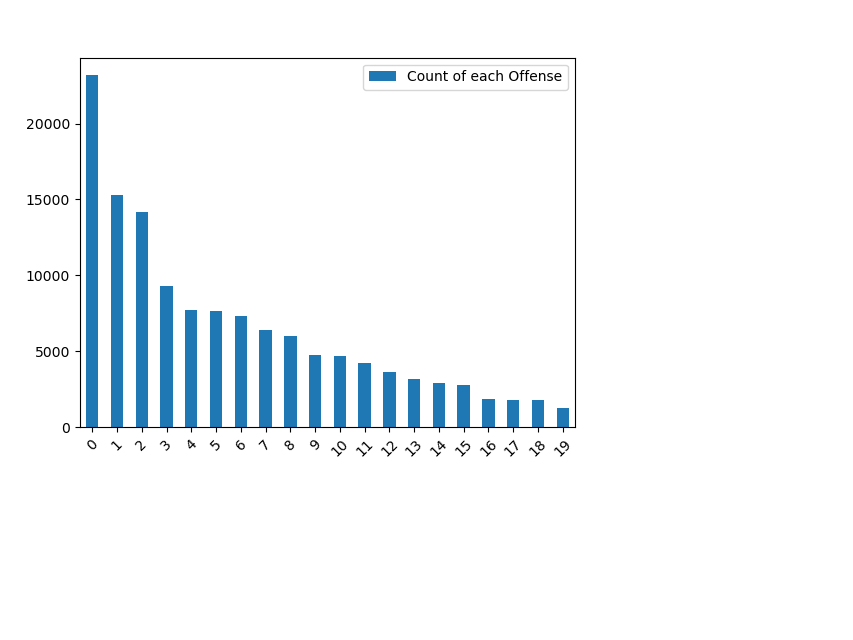

In [411]:
ax = top_20.plot.bar( y='Count of each Offense', rot=45)

In [412]:
top_20

,Type of Offense,Count of each Offense
0,ASSAULT 3 & RELATED OFFENSES,23188
1,BURGLARY,15288
2,JOSTLING,14190
3,RAPE,9327
4,SEX CRIMES,7717
5,FELONY ASSAULT,7686
6,DANGEROUS WEAPONS,7310
7,ARSON,6432
8,ROBBERY,6011
9,OTHER STATE LAWS (NON PENAL LA,4731


In [413]:
df_male = df.loc[df["Gender"] == 1 ]
df_female = df.loc[df["Gender"] == 2 ]

Offense_Description_Count_Male = df_male['Offense Description 2'].value_counts().tolist()
Offense_Description_Names_Male = df_male['Offense Description 2'].unique().tolist()

Offense_Description_Count_Female = df_female['Offense Description 2'].value_counts().tolist()
Offense_Description_Names_Female = df_female['Offense Description 2'].unique().tolist()

In [414]:
num_unique_offense_Male = pd.DataFrame({
    "Type of Offense": Offense_Description_Names_Male,
    "Count of each Offense": Offense_Description_Count_Male
})

num_unique_offense_Female = pd.DataFrame({
    "Type of Offense": Offense_Description_Names_Female,
    "Count of each Offense": Offense_Description_Count_Female
})

<IPython.core.display.Javascript object>


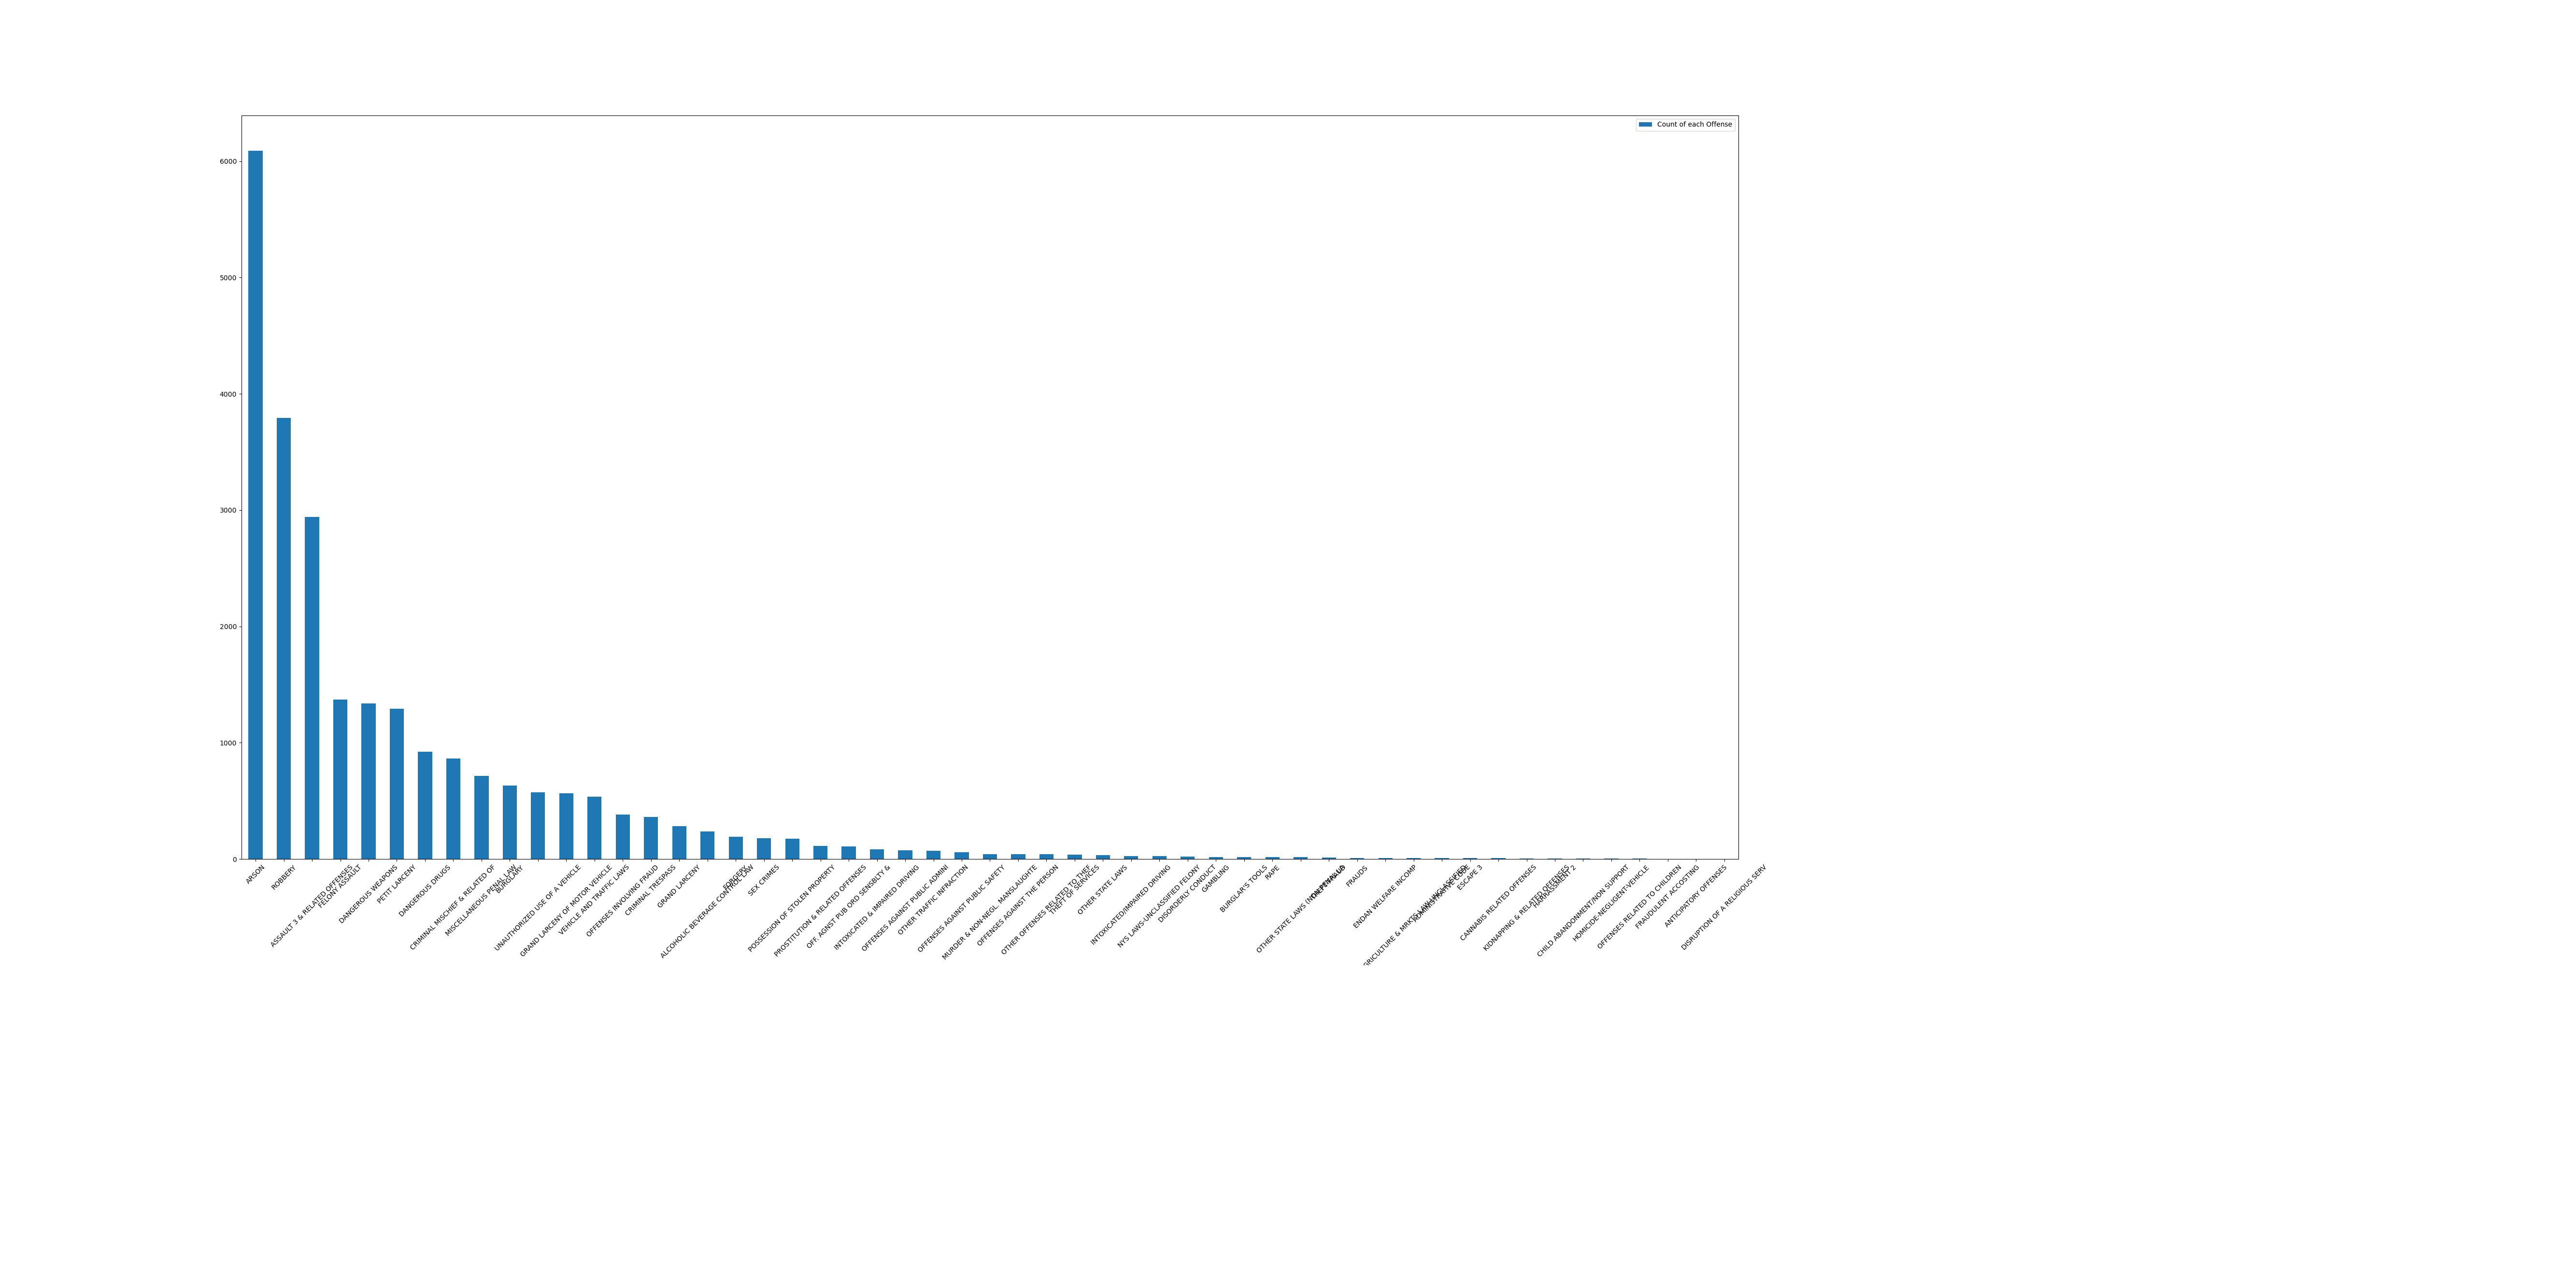

<AxesSubplot:xlabel='Type of Offense'>

In [415]:

num_unique_offense_Female.plot.bar(x = 'Type of Offense', y = 'Count of each Offense', rot=45,figsize=(40,20))




In [416]:
num_unique_offense_Female = num_unique_offense_Female.head(30)

In [417]:
num_unique_offense_Male = num_unique_offense_Male.head(30)

In [418]:
merged_df = pd.merge(num_unique_offense_Male, num_unique_offense_Female, on="Type of Offense")

In [419]:
merged_df.columns = ['Type of Offense', 'Count of Offense (Male)', 'Count of Offense (Female)']

<IPython.core.display.Javascript object>


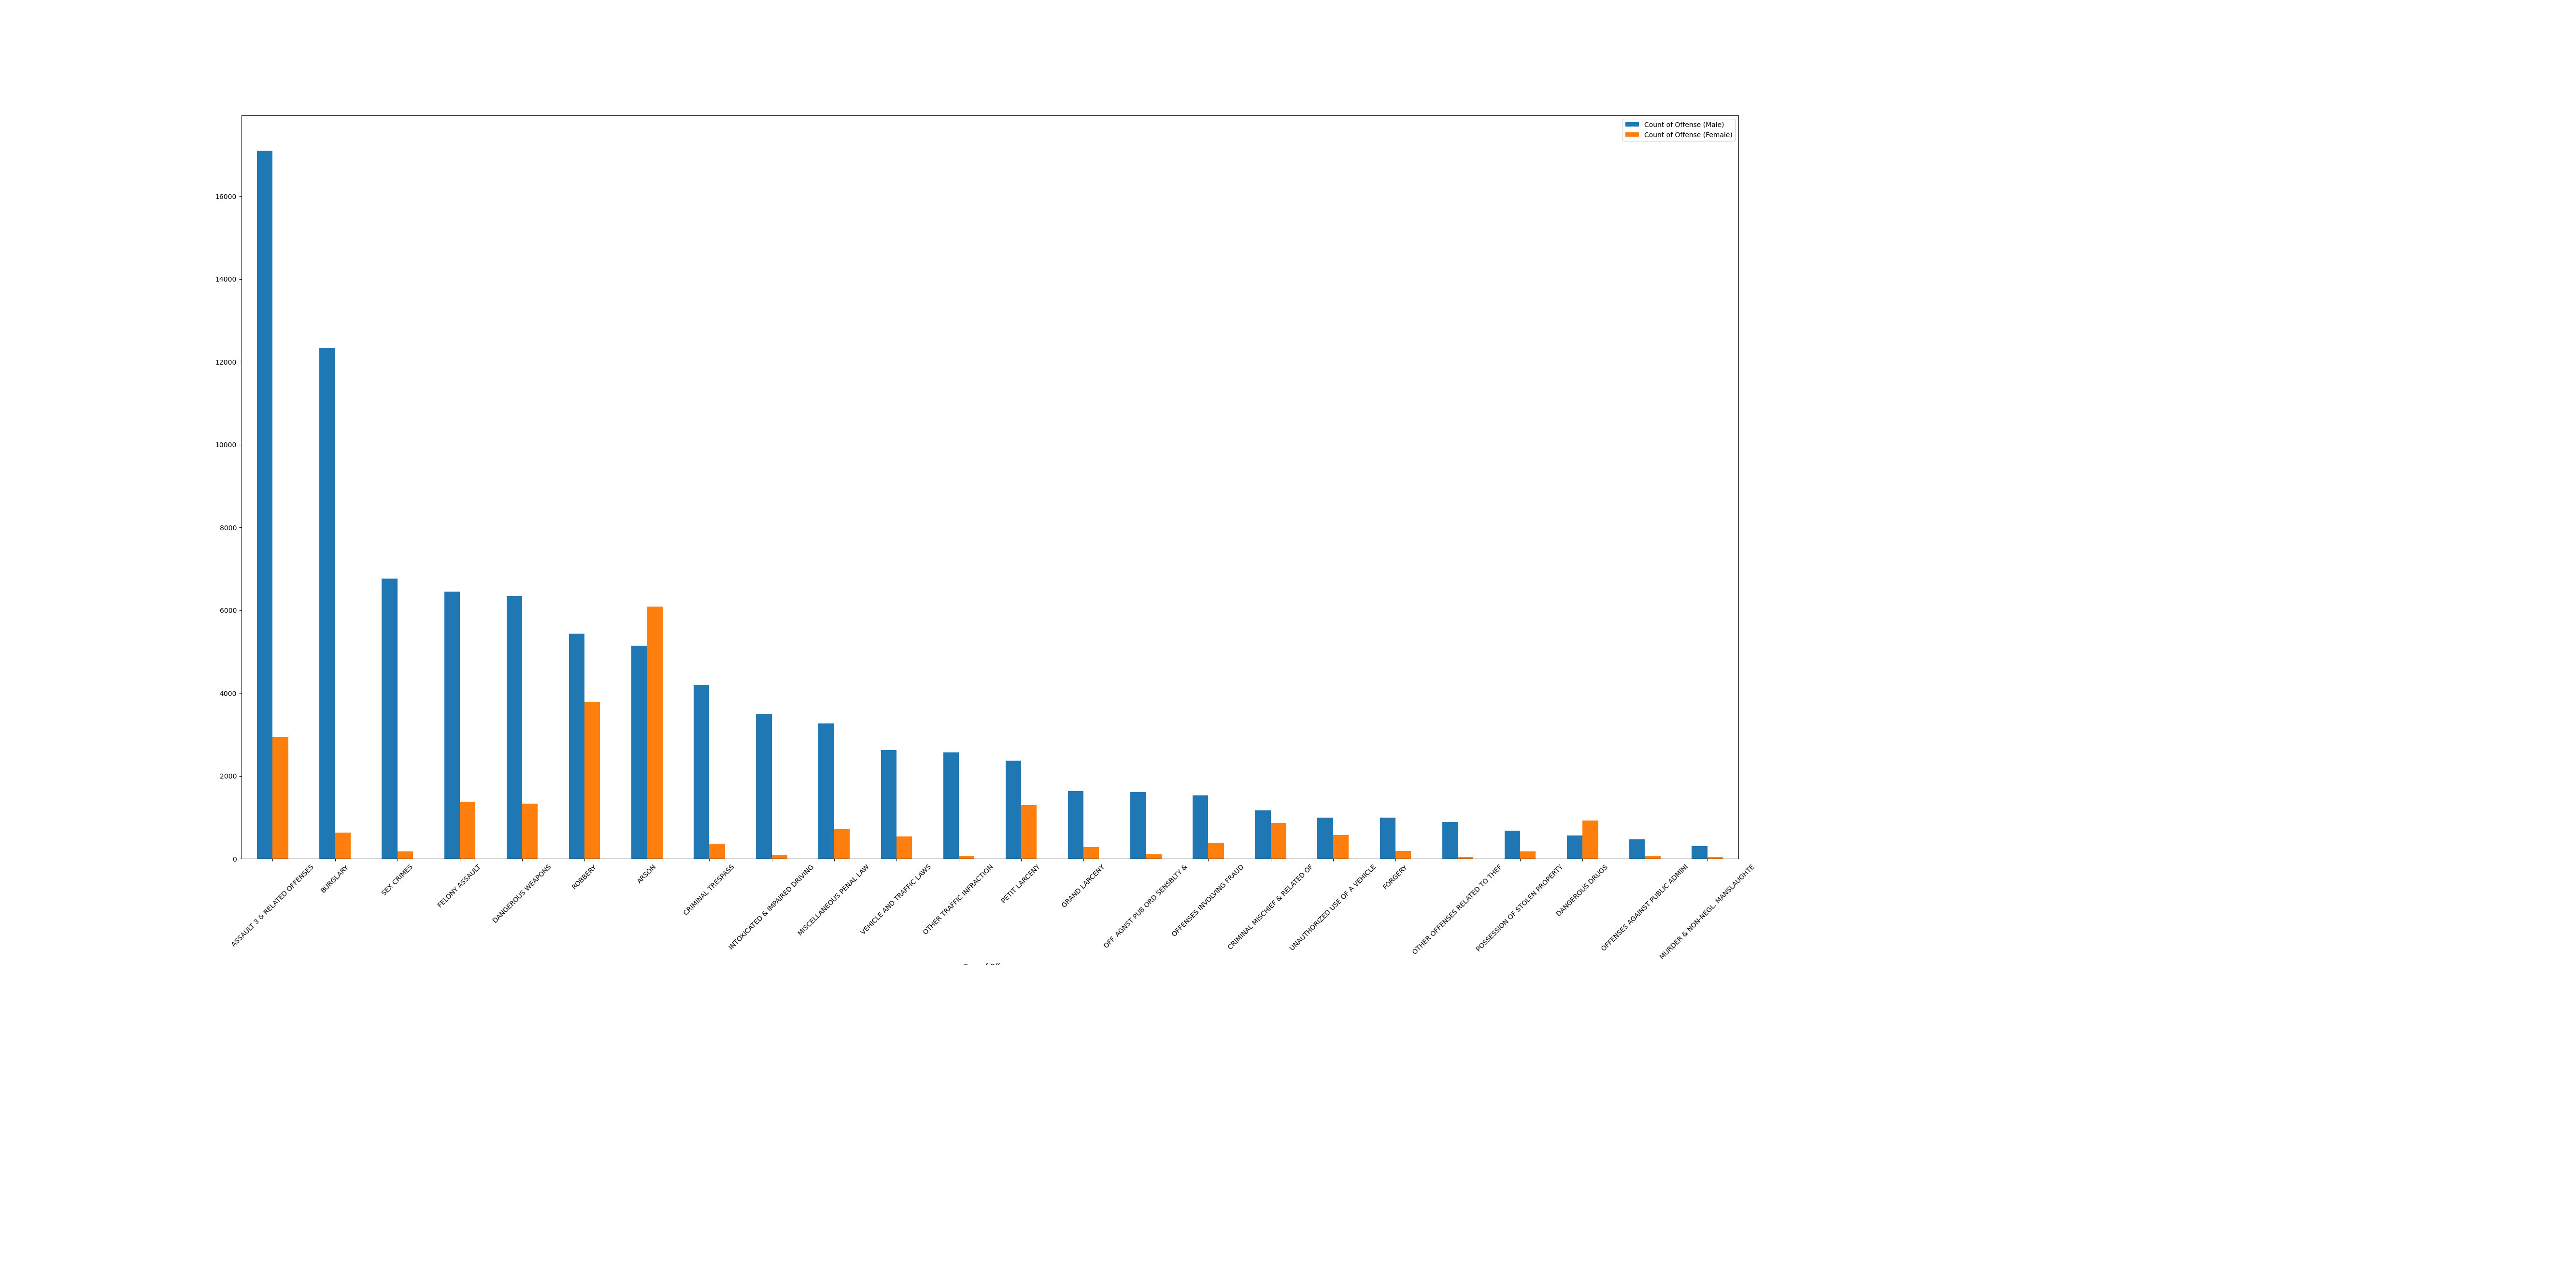

In [420]:
barchart_Crime_by_gender = merged_df.plot.bar(x = 'Type of Offense',rot=45, figsize=(40,20))


In [421]:
df_Bronx_male = df_Bronx.loc[df_Bronx["Gender"] == 1 ]
df_Bronx_female = df_Bronx.loc[df_Bronx["Gender"] == 2 ]
Offense_Description_Count_Male_Bronx = df_Bronx_male['Offense Description 2'].value_counts().tolist()
Offense_Description_Names_Male_Bronx = df_Bronx_male['Offense Description 2'].unique().tolist()

Offense_Description_Count_Female_Bronx = df_Bronx_female['Offense Description 2'].value_counts().tolist()
Offense_Description_Names_Female_Bronx = df_Bronx_female['Offense Description 2'].unique().tolist()

In [422]:
num_unique_offense_Male_Bronx = pd.DataFrame({
    "Type of Offense": Offense_Description_Names_Male_Bronx,
    "Count of each Offense": Offense_Description_Count_Male_Bronx
})

num_unique_offense_Female_Bronx = pd.DataFrame({
    "Type of Offense": Offense_Description_Names_Female_Bronx,
    "Count of each Offense": Offense_Description_Count_Female_Bronx
})

In [423]:
merged_df_Bronx = pd.merge(num_unique_offense_Male_Bronx, num_unique_offense_Female_Bronx, on="Type of Offense")
merged_df_Bronx.columns = ['Type of Offense', 'Count of Offense (Male)', 'Count of Offense (Female)']

merged_df_Bronx = merged_df_Bronx.head(30)

<IPython.core.display.Javascript object>


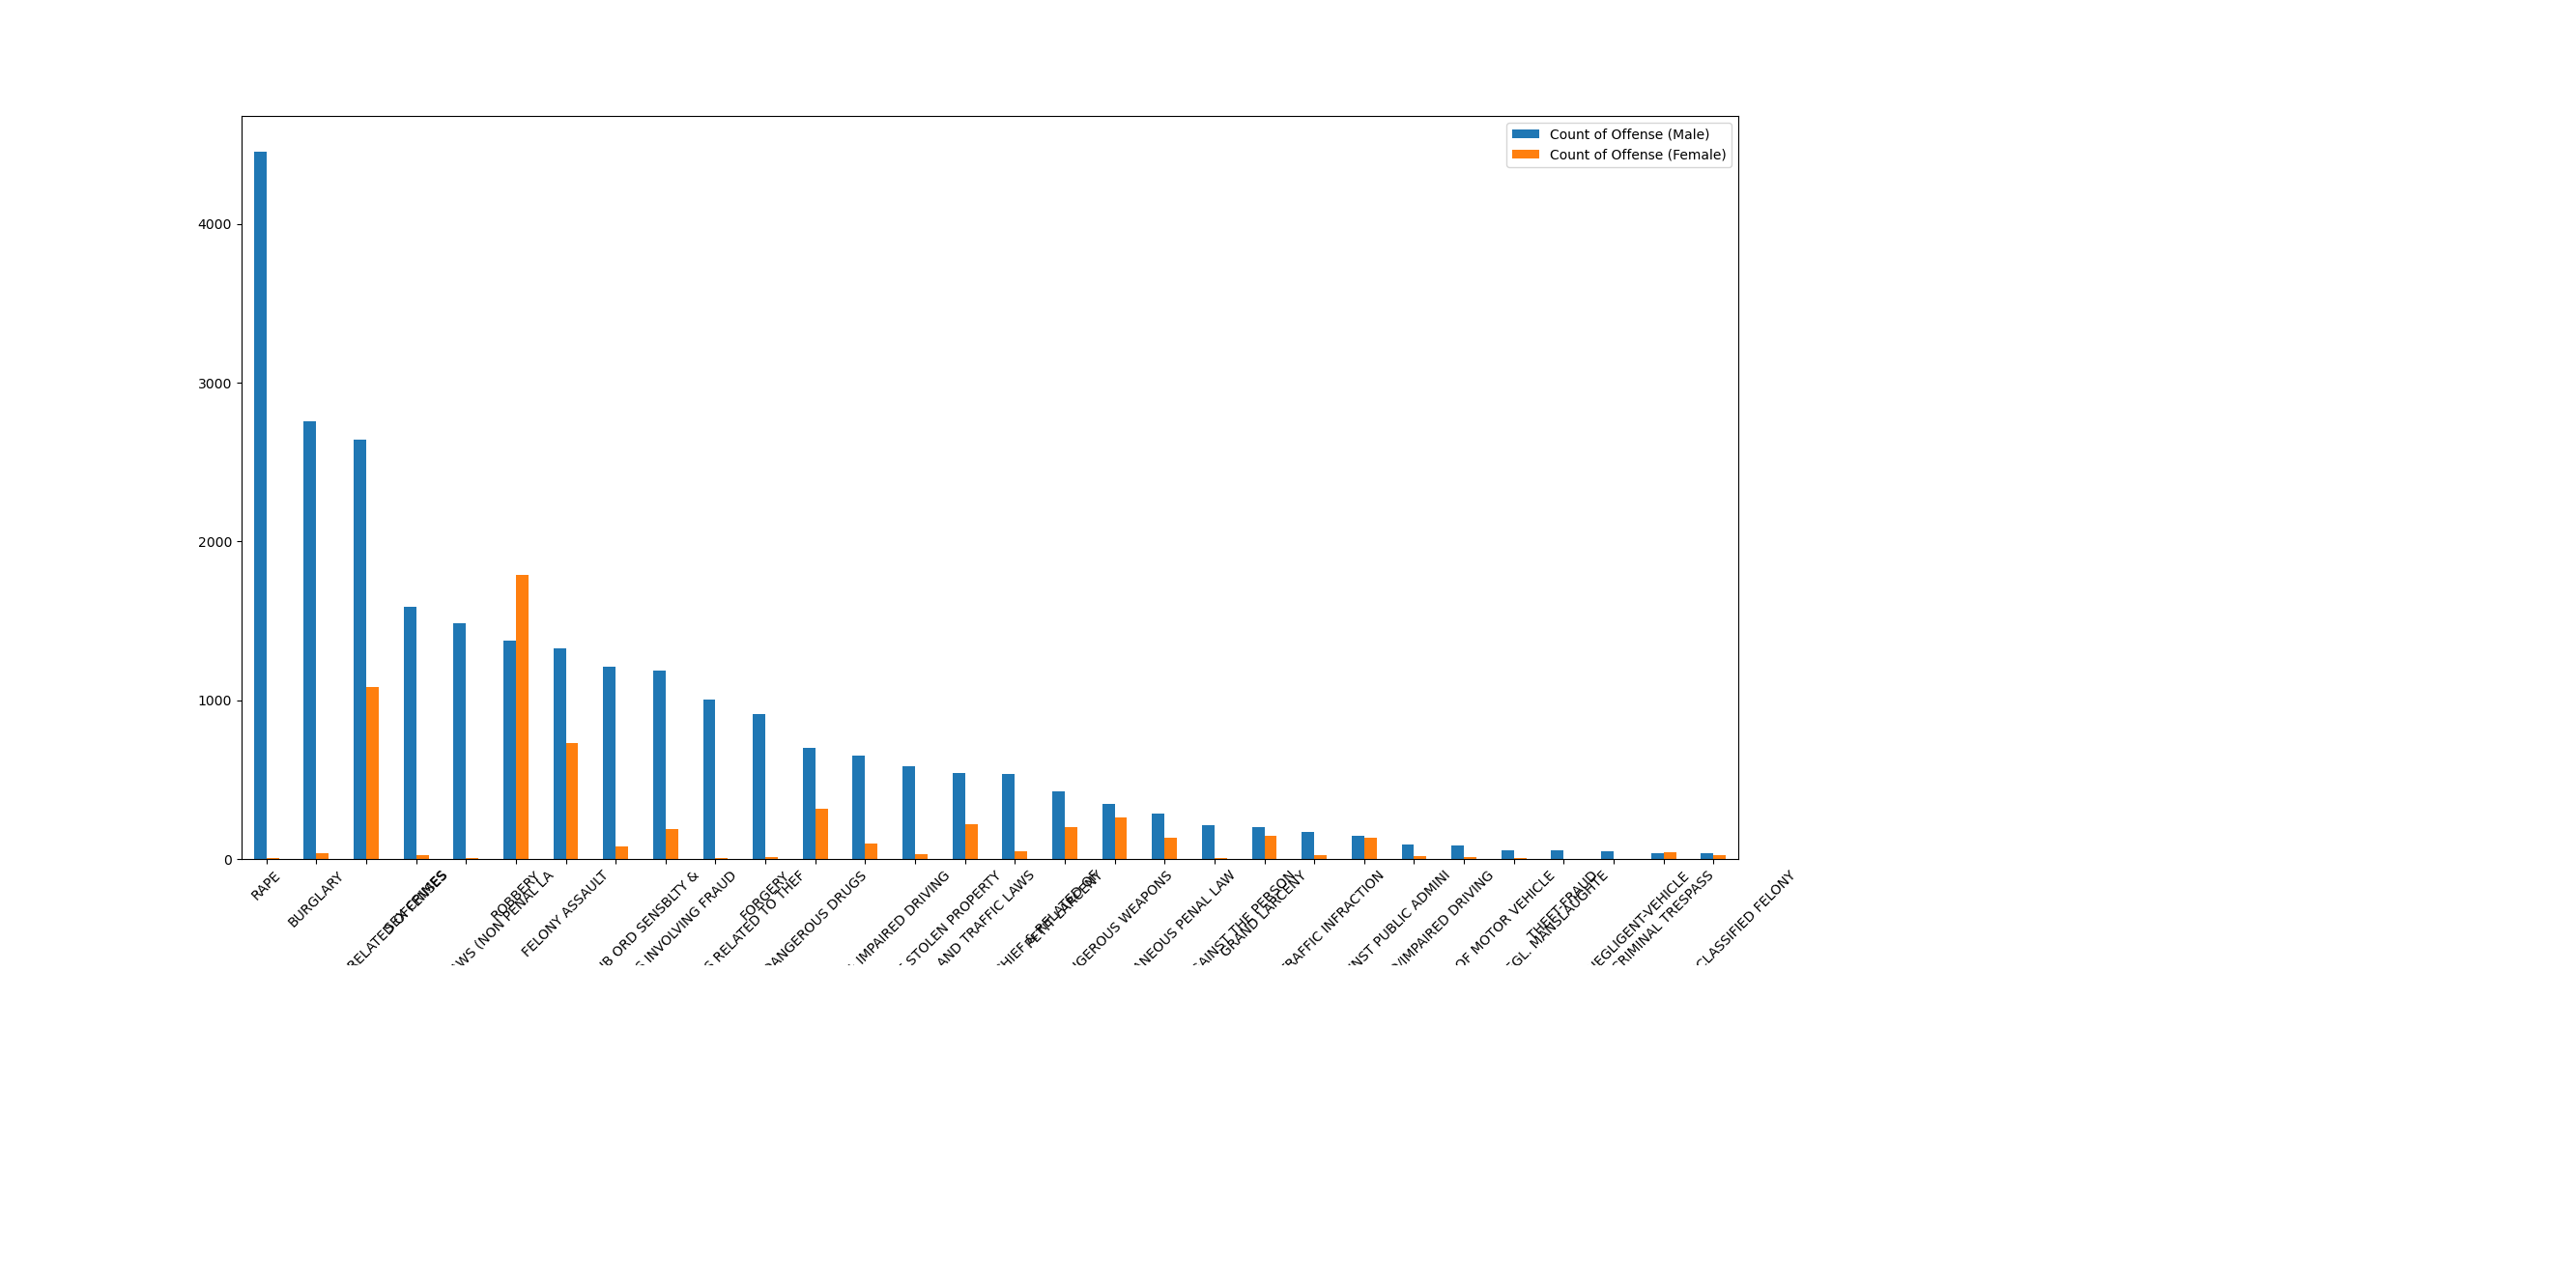

[Text(0, 0, 'RAPE'),
 Text(1, 0, 'BURGLARY'),
 Text(2, 0, 'ASSAULT 3 & RELATED OFFENSES'),
 Text(3, 0, 'SEX CRIMES'),
 Text(4, 0, 'OTHER STATE LAWS (NON PENAL LA'),
 Text(5, 0, 'ROBBERY'),
 Text(6, 0, 'FELONY ASSAULT'),
 Text(7, 0, 'OFF. AGNST PUB ORD SENSBLTY &'),
 Text(8, 0, 'OFFENSES INVOLVING FRAUD'),
 Text(9, 0, 'OTHER OFFENSES RELATED TO THEF'),
 Text(10, 0, 'FORGERY'),
 Text(11, 0, 'DANGEROUS DRUGS'),
 Text(12, 0, 'INTOXICATED & IMPAIRED DRIVING'),
 Text(13, 0, 'POSSESSION OF STOLEN PROPERTY'),
 Text(14, 0, 'VEHICLE AND TRAFFIC LAWS'),
 Text(15, 0, 'CRIMINAL MISCHIEF & RELATED OF'),
 Text(16, 0, 'PETIT LARCENY'),
 Text(17, 0, 'DANGEROUS WEAPONS'),
 Text(18, 0, 'MISCELLANEOUS PENAL LAW'),
 Text(19, 0, 'OFFENSES AGAINST THE PERSON'),
 Text(20, 0, 'GRAND LARCENY'),
 Text(21, 0, 'OTHER TRAFFIC INFRACTION'),
 Text(22, 0, 'OFFENSES AGAINST PUBLIC ADMINI'),
 Text(23, 0, 'INTOXICATED/IMPAIRED DRIVING'),
 Text(24, 0, 'GRAND LARCENY OF MOTOR VEHICLE'),
 Text(25, 0, 'MURDER & NON-NEGL. MAN

In [424]:
barchart_Crime_by_gender_Bronx = merged_df_Bronx.plot.bar(x = 'Type of Offense',
                                                          rot=45, 
                                                          figsize = (20,10))
barchart_Crime_by_gender_Bronx.set_xticklabels(merged_df_Bronx["Type of Offense"], rotation=45)

In [425]:
merged_df_Bronx.set_index('Type of Offense')


,Count of Offense (Male),Count of Offense (Female)
Type of Offense,,
RAPE,4458,4
BURGLARY,2755,38
ASSAULT 3 & RELATED OFFENSES,2642,1085
SEX CRIMES,1589,28
OTHER STATE LAWS (NON PENAL LA,1488,8
ROBBERY,1373,1787
FELONY ASSAULT,1327,730
OFF. AGNST PUB ORD SENSBLTY &,1211,77
OFFENSES INVOLVING FRAUD,1190,189


In [426]:
df

,Arrest Number,Arrest Date,Offense Code,Offense Description 1,KY number,Offense Description 2,Law Code,Law Category CD,Arrest Borough,Arrest Precinct,Jurisdiction Code,Age Group,Gender,Ethnicity,X Coordinate,Y Coordinate,Latitude,Longitude,Geocoded
0,238942621,01/10/2022,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,3,4,9,0,18-24,1,WHITE,987058,203626,40.725583,-73.989869,POINT (-73.98986919 40.72558254)
1,238980679,01/11/2022,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,1,5,101,0,25-44,1,WHITE,1052353,159425,40.604001,-73.754742,POINT (-73.754742 40.604001)
2,239553009,01/23/2022,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,3,5,110,1,25-44,1,BLACK,1027679,214505,40.755336,-73.843245,POINT (-73.84324519 40.75533648)
3,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,1,3,71,0,25-44,1,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
4,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,1,3,84,0,18-24,1,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140559,251412120,09/21/2022,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,3,1,41,0,25-44,1,WHITE HISPANIC,1013096,236605,40.816057,-73.895785,POINT (-73.895785 40.816057)
140560,249578318,08/15/2022,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,1,3,70,0,25-44,1,BLACK,991549,169019,40.630600,-73.973705,POINT (-73.9737053160275 40.6305998504358)
140561,247641284,07/06/2022,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,3,3,78,0,45-64,1,BLACK,990420,188642,40.684454,-73.977750,POINT (-73.97775 40.684454)
140562,251006627,09/13/2022,508.0,"DRUG PARAPHERNALIA, POSSESSE",235.0,DANGEROUS DRUGS,PL 2205001,3,1,43,0,25-44,2,BLACK,1019464,241704,40.830027,-73.872754,POINT (-73.87275417 40.83002685)


<IPython.core.display.Javascript object>


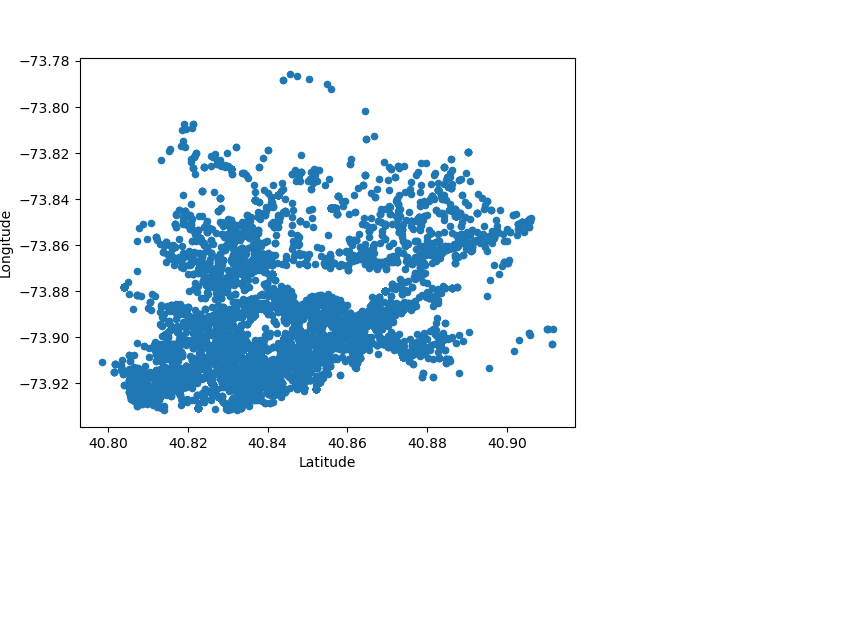

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

In [431]:
df_Bronx_Felony = df_Bronx.loc[df_Bronx["Law Category CD"] == 1]
df_Bronx_Felony.plot.scatter(x = 'Latitude', y='Longitude', by = 'Offense Description 2')

<IPython.core.display.Javascript object>


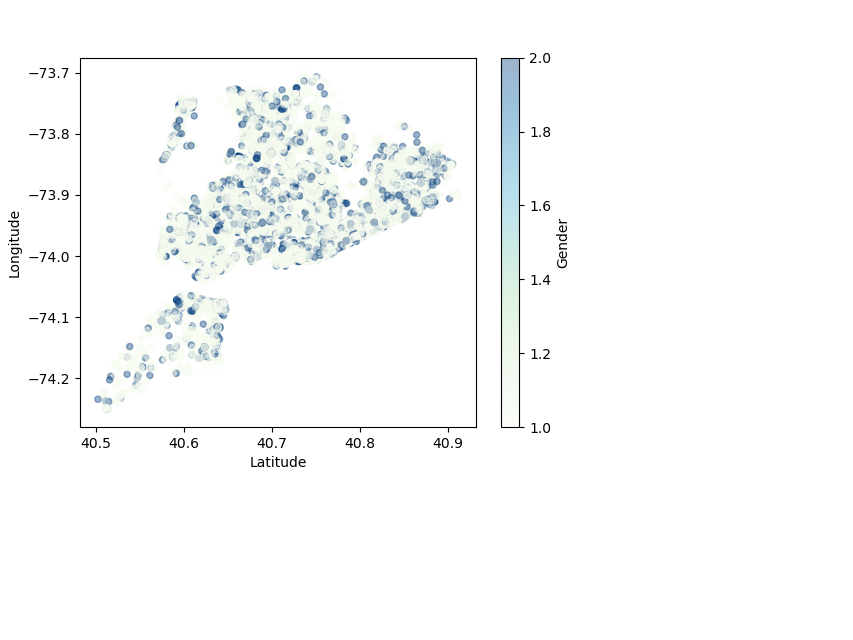

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

In [444]:
df_felony = df.loc[df['Law Category CD'] == 1]

df_felony.plot.scatter('Latitude', 'Longitude', c = 'Gender', alpha = 0.4, cmap = 'GnBu')

<IPython.core.display.Javascript object>


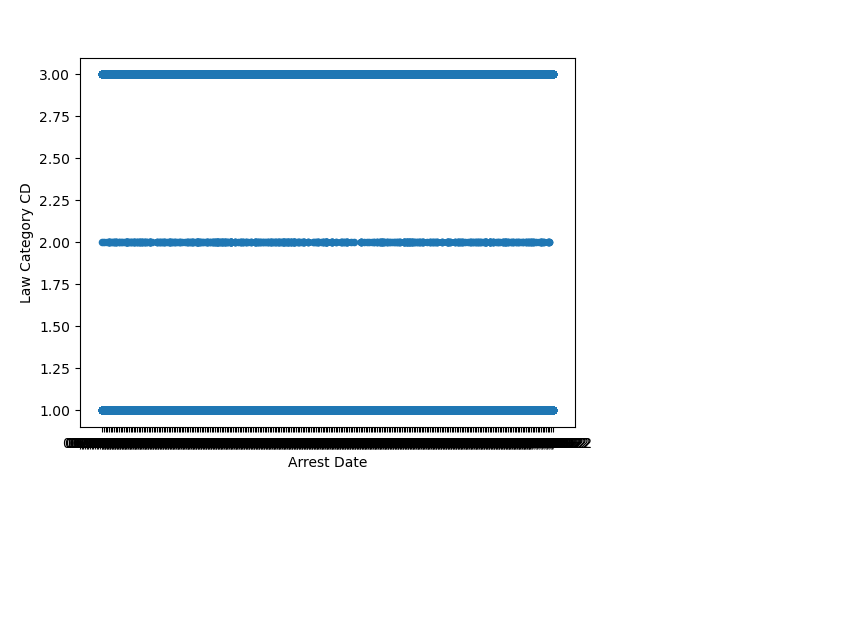

array([<AxesSubplot:xlabel='Arrest Date', ylabel='Law Category CD'>],
      dtype=object)

In [447]:
df.plot.scatter(x = 'Arrest Date', y = 'Law Category CD')